In [ ]:
!pip install fastai --upgrade -q
#!pip install google

In [1]:
from fastai.vision.all import *

In [2]:
#!unzip data/bullbear.zip -d data/bullbear

In [2]:
chart_class = 'BULL','BEAR'
root_dir = 'data'
base_dir = root_dir + '/bullbear'
path = Path(base_dir)
print(path)

data/bullbear


In [3]:
charts = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=Resize(400))
    #item_tfms=RandomResizedCrop(224, min_scale=0.5)
   #batch_tfms=aug_transforms()

In [4]:
#dls = charts.dataloaders(path,batch_size=20)
dls = charts.dataloaders(path)

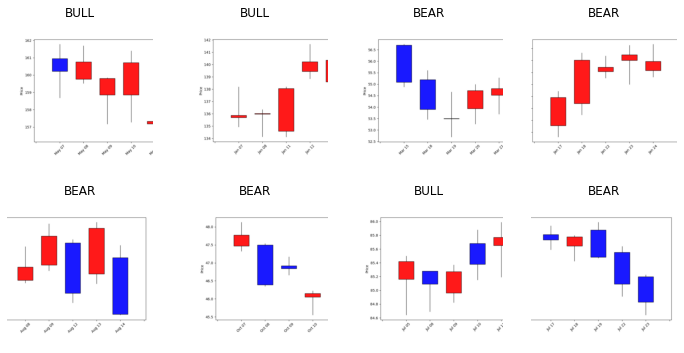

In [5]:
dls.train.show_batch(max_n=8, nrows=2)

In [6]:
import torch
torch.cuda.empty_cache()

In [7]:

learn = cnn_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.model = torch.nn.DataParallel(learn.model, device_ids=[0, 1,2,3,4,5,])
#lr_min, lr_steep = learn.lr_find()
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.667534,0.612770,0.668229,03:56


epoch,train_loss,valid_loss,accuracy,time
0,0.467121,0.391611,0.828083,07:53
1,0.421372,0.369111,0.832249,07:53
2,0.392977,0.367110,0.832162,07:58
3,0.388685,0.368189,0.833724,07:56
4,0.366284,0.337911,0.841881,07:58
5,0.342178,0.328096,0.843877,07:56
6,0.336580,0.317038,0.846134,07:55
7,0.313708,0.316694,0.847783,07:56
8,0.291162,0.316120,0.848564,07:54
9,0.286926,0.318052,0.848998,11:39


In [ ]:
#dls.vocab

              precision    recall  f1-score   support

        BEAR       0.86      0.67      0.76      3983
        BULL       0.85      0.94      0.89      7540

    accuracy                           0.85     11523
   macro avg       0.85      0.81      0.82     11523
weighted avg       0.85      0.85      0.84     11523



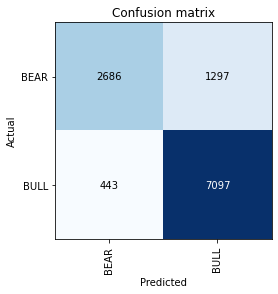

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
#interp.most_confused()
interp.print_classification_report()

In [13]:
pkl_name = "export_bull_bear.pkl"
learn.model = learn.model.module
learn.export(pkl_name)
path = Path()
path.ls(file_exts=pkl_name)

ModuleAttributeError: 'Sequential' object has no attribute 'module'